In [18]:
%cd D:/SAME/Msc/5th semester/Pattern Recognition/HWs/HW4/Q9

D:\SAME\Msc\5th semester\Pattern Recognition\HWs\HW4\Q9


20

0.732

0.614


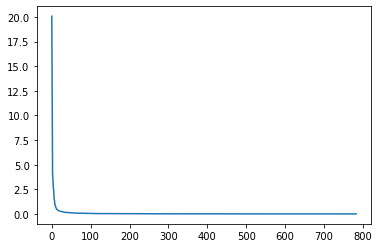

In [33]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
from sklearn.preprocessing import minmax_scale
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB


def CCRCAL(test,decision):
    CCR1 = 0
    for j in range(len(decision)):
        if test[j][0] == decision[j]:
            CCR1 += 1
    return CCR1

train_data = pd.read_csv('trainData.csv')
test_data = pd.read_csv('testData.csv')
train_label = pd.read_csv('trainLabels.csv')
train_label = train_label[0:3000]
test_label = pd.read_csv('testLabels.csv')
test_label = np.array(test_label[0:500])

trainscaled = minmax_scale(train_data, feature_range=(0,1))
testscaled = minmax_scale(test_data, feature_range=(0,1))

train = np.array(trainscaled[0:3000,:])
test = np.array(testscaled[0:500,:])

AllData = np.concatenate((train, test), axis = 0)

mean = AllData.mean(axis=0)

cov = np.cov(AllData, rowvar=False)

eigval, eigvec = LA.eig(cov)

eigValSort = np.sort(eigval)
eigValSort2 = eigValSort[::-1]

V = np.zeros((eigvec.shape[0],eigvec.shape[1]))
for i in range(len(eigValSort)):
    idx = list(eigval).index(eigValSort2[i])
    V[:][i] = eigvec[:][idx]
    
V_T = V.T

eigscaled = minmax_scale(eigValSort2, feature_range=(0,1))

for i in range(len(eigscaled)):
    if eigscaled[i]<1.5e-2:
        n = i-1
        break
        

V_T = V_T[0:n,:]

X_hat = np.zeros((len(AllData),n))
for i in range(len(AllData)):
    x = AllData[i,:]-mean
    X_hat[i,:] = np.matmul(V_T,x)
    

new_train = X_hat[0:3000,:]
new_test = X_hat[3000:3500,:]

GNB = GaussianNB()

GNB.fit(new_train, train_label.values.ravel())
test_decision = GNB.predict(new_test)
CCR1 = CCRCAL(test_label, test_decision)

GNB.fit(train, train_label.values.ravel())
test_decision2 = GNB.predict(test)
CCR2 = CCRCAL(test_label, test_decision2)

print(n)
print()
print(CCR1/len(test_label))
print()
print(CCR2/len(test_label))

plt.plot(eigValSort2)
plt.show()
